# Analysing the results

In [22]:
# we need pillow version of 5.3.0
# we will uninstall the older version first
!pip uninstall -y Pillow
# install the new one
!pip install Pillow==5.3.0
# import the new one
import PIL
print(PIL.PILLOW_VERSION)
# this should print 5.3.0. If it doesn't, then restart your runtime:
# Menu > Runtime > Restart Runtime

Uninstalling Pillow-5.3.0:
  Successfully uninstalled Pillow-5.3.0
  Using cached https://files.pythonhosted.org/packages/62/94/5430ebaa83f91cc7a9f687ff5238e26164a779cca2ef9903232268b0a318/Pillow-5.3.0-cp36-cp36m-manylinux1_x86_64.whl


5.3.0


## Importing and loading files

In [0]:
import numpy as np
import pandas as pd

In [2]:
sub = pd.read_csv('submission.csv')
sub.head()

,qid,prediction
0,00014894849d00ba98a9,False
1,000156468431f09b3cae,False
2,000227734433360e1aae,False
3,0005e06fbe3045bd2a92,False
4,00068a0f7f41f50fc399,False


In [3]:
test = pd.read_csv('test.csv')
test.head()

,qid,question_text
0,00014894849d00ba98a9,My voice range is A2-C5. My chest voice goes u...
1,000156468431f09b3cae,How much does a tutor earn in Bangalore?
2,000227734433360e1aae,What are the best made pocket knives under $20...
3,0005e06fbe3045bd2a92,Why would they add a hypothetical scenario tha...
4,00068a0f7f41f50fc399,What is the dresscode for Techmahindra freshers?


In [4]:
data = pd.concat([test,sub], axis= 1,join='inner')
data.head()

,qid,question_text,qid,prediction
0,00014894849d00ba98a9,My voice range is A2-C5. My chest voice goes u...,00014894849d00ba98a9,False
1,000156468431f09b3cae,How much does a tutor earn in Bangalore?,000156468431f09b3cae,False
2,000227734433360e1aae,What are the best made pocket knives under $20...,000227734433360e1aae,False
3,0005e06fbe3045bd2a92,Why would they add a hypothetical scenario tha...,0005e06fbe3045bd2a92,False
4,00068a0f7f41f50fc399,What is the dresscode for Techmahindra freshers?,00068a0f7f41f50fc399,False


In [5]:
data.pop('qid').head()

,qid,qid
0,00014894849d00ba98a9,00014894849d00ba98a9
1,000156468431f09b3cae,000156468431f09b3cae
2,000227734433360e1aae,000227734433360e1aae
3,0005e06fbe3045bd2a92,0005e06fbe3045bd2a92
4,00068a0f7f41f50fc399,00068a0f7f41f50fc399


In [6]:
data.head()

,question_text,prediction
0,My voice range is A2-C5. My chest voice goes u...,False
1,How much does a tutor earn in Bangalore?,False
2,What are the best made pocket knives under $20...,False
3,Why would they add a hypothetical scenario tha...,False
4,What is the dresscode for Techmahindra freshers?,False


In [7]:
ins = data[data['prediction'] == True]
ins.head()

,question_text,prediction
39,Why don't India start a War with Pakistan ? Th...,True
46,Are the BJP bhakts satisfied that prices of pe...,True
77,Why do people think white privilege is real wh...,True
98,Why does Quora send me a notice because I told...,True
102,Can a bleeding heart liberal be happily marrie...,True


In [9]:
sample = ins.sample(10)
sample.pop('prediction')
sample.head()

,question_text
6079,"Are those men, who are not successful with wom..."
12354,Why do girls these days are big bitches and sh...
17839,How can we stop gay people from redefining and...
6751,Is it okay if I cannot forgive Europeans for s...
50425,If the Republican tax cuts don't grow the econ...


In [0]:
sample = np.array(sample)

In [11]:
print(sample)

[['Are those men, who are not successful with women, real men? Do they deserve any respect?']
 ['Why do girls these days are big bitches and show and feel as if they are innocent and helpless?']
 ['How can we stop gay people from redefining and changing the basic fabric of society for everybody else?']
 ['Is it okay if I cannot forgive Europeans for screwing up our world?']
 ["If the Republican tax cuts don't grow the economy enough to pay for itself, will the recipients of those tax cuts give the money back? If not, isn't that like stealing from the poor and giving it to the rich?"]
 ['Is it sexist that there is a Quora category for cheating husbands but not one for cheating wives?']
 ['As a big gay hater, why BTS fans ship the members with each other. Are the majority the fans gay?']
 ["Why are people complaining about Elon Musk selling flamethrowers as they are 'dangerous' when it's the same as a propane torch which anyone could buy?"]
 ['Is it bad that I want a women to love me for

Above we can see a sample of some of the questions that the network detected as insincere. Something interesting is that current controversial themes seem really attractive to the network.

In [13]:
train = pd.read_csv('train.csv')
train.pop('qid').head()

0    00002165364db923c7e6
1    000032939017120e6e44
2    0000412ca6e4628ce2cf
3    000042bf85aa498cd78e
4    0000455dfa3e01eae3af
Name: qid, dtype: object

In [0]:
train = train[train['target'] == 1]

In [15]:
train.pop('target').head()

22     1.0
30     1.0
110    1.0
114    1.0
115    1.0
Name: target, dtype: float64

In [0]:
train = train.sample(10)

In [17]:
train = np.array(train)
print(train)

[['Why is men so degrading?']
 ['Why is eating beef more important to the people of Kerala than respecting a religion?']
 ['Why are Swedish people so much better looking than British people?']
 ["Do liberals support President's Trump efforts to flood Europe with exported American petroleum products? This policy will hurt Russia."]
 ['How come pro-lifers are staying quiet about children being separated from their parents?']
 ["Who agrees that women are like a bloom and should marry young in order to find a husband? I'm a woman saying this by the way, and this is a joint account. Don't judge."]
 ['Will a loving father ever rape his own daughter? Can this work together?']
 ['Why do black people walk so slow when they cross the street?']
 ['Why can’t humans be themselves, it seems like nothing is natural anymore?']
 ['Why many feminist make men feel guilty for their gender?']]


Above we can see a sample of questions tagged as insincere in the training set. Not too different, isn't it?

## Wordcloud visualization

In [0]:
from wordcloud import WordCloud, STOPWORDS

In [0]:
# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown', 'Quora', 'questions'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()
    plt.savefig('wordcloud.png', dpi = 600)
    


In [0]:
import os
import string
import matplotlib.pyplot as plt

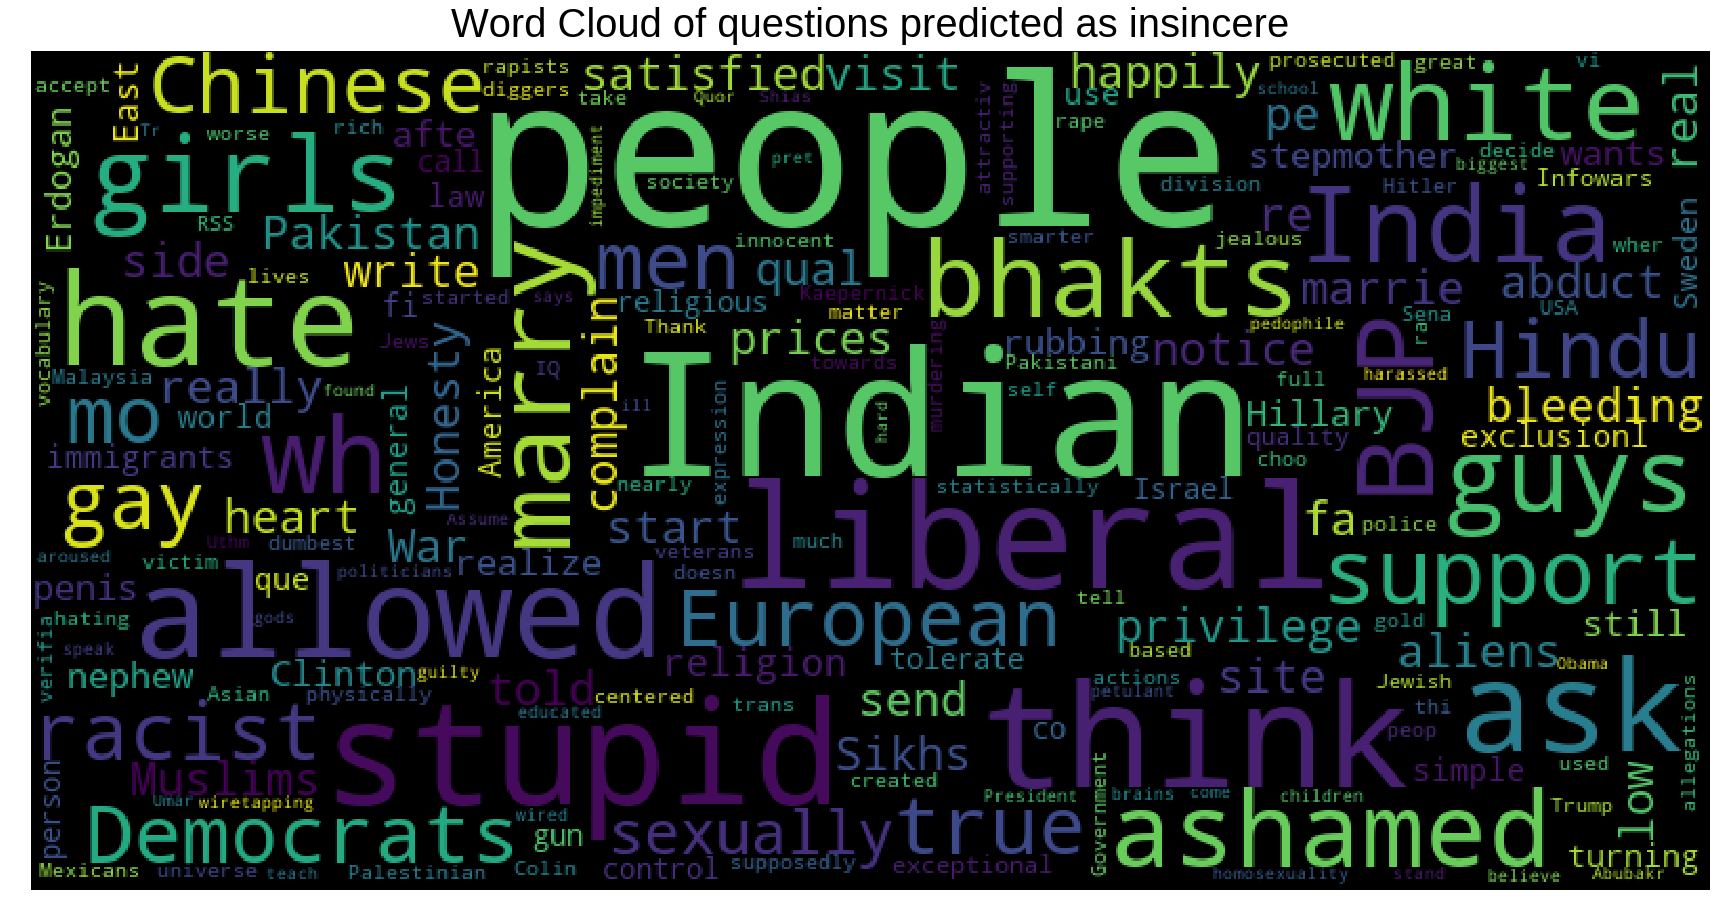

In [31]:
plot_wordcloud(ins["question_text"], title="Word Cloud of questions predicted as insincere")

As we can see above, the network really detects well questions related to polemic themes, like politics and matters of race and gender. Therefore, the visualization provided proves the feeling we get seeing the previous samples.